In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("pima_indians_diabetes.csv")
data.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
data.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [6]:
file_name = "pima_indians_diabetes.csv"
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
    ]
array = data.values

In [7]:
X = array[:,:8]
Y = array[:,8]

In [8]:
folds_num = 10
kfolds = KFold(n_splits=10)

Gridsearch Algorithm for algorithm Tunning

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [11]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grid,)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [12]:
print(grid.best_score_)

0.7578558696205755


In [13]:
print(grid.best_params_)

{'n_neighbors': 14}


Visualize the GridSearchCV result

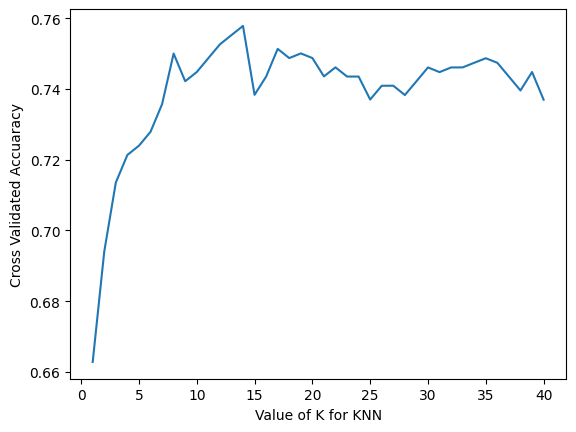

In [14]:
k_range = range(1,41)
k_score = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  score = cross_val_score(knn,X,Y,cv=5)
  k_score.append(score.mean())
plt.plot(k_range,k_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuaracy")
plt.show()

In [17]:
final_model = KNeighborsClassifier(n_neighbors=14)
score = cross_val_score(final_model,X,Y,cv=kfolds)

In [19]:
print(score.mean())

0.7564764183185235
